<a href="https://colab.research.google.com/github/Abdelrahman-Hashemm/simple-sequential---functional---sub_class-models-for-mnist-data-set/blob/main/Dogs_and_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


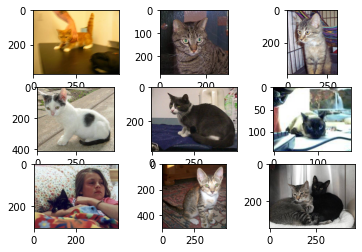

In [ ]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/drive/My Drive/CatandDogs/train/catt'
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # define filename
 filename = folder + '/cat.' + str(i) + '.jpg'
 # load image pixels
 image = imread(filename)
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure

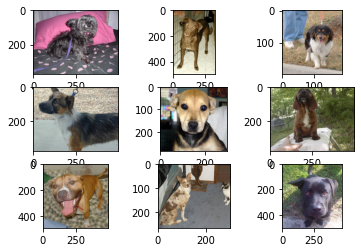

In [ ]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/drive/My Drive/CatandDogs/train/dogt'
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # define filename
 filename = folder + '/dog.' + str(i) + '.jpg'
 # load image pixels
 image = imread(filename)
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()


Structure of Data

In [ ]:
'''
dataset_dogs_vs_cats
├── test
│   ├── cats
│   └── dogs
└── train
|    ├── cats     
│    └── dogs    
└── valid
     ├── cats
     └── dogs
'''

'\ndataset_dogs_vs_cats\n├── test\n│   ├── cats\n│   └── dogs\n└── train\n|    ├── cats     \n│    └── dogs    \n└── valid\n     ├── cats\n     └── dogs\n'

# **Building the model**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape = (180, 180, 3))
x = layers.Rescaling(1./255)(inputs) #rescal the inputs to [0, 1] range by dividing it by 255
x = layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)

model = keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [ ]:
#Configuring the model for training

model.compile(loss = 'binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [ ]:
train_data = '/content/drive/My Drive/CatandDogs/train'
valid_data = '/content/drive/My Drive/CatandDogs/validation'
test_data = '/content/drive/My Drive/CatandDogs/test'

# **Data preprocessing**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

training_dataset = image_dataset_from_directory(train_data,
                                             image_size = (180, 180),
                                             batch_size = 32)
validation_dataset = image_dataset_from_directory(valid_data,
                                                  image_size = (180, 180),
                                                  batch_size = 32)
testing_data = image_dataset_from_directory(test_data,
                                            image_size = (180, 180),
                                            batch_size = 32)

Found 4002 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in training_dataset:
  print('data batch shape: ', data_batch.shape)
  print('labels batch shape: ',labels_batch.shape)
  break

data batch shape:  (32, 180, 180, 3)
labels batch shape:  (32,)


In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(filepath = '/content/drive/My Drive/CatandDogs/save_after_each_epoch',
                                             save_best_only = True,
                                             monitor = 'val_loss')]

history = model.fit(training_dataset,
                    epochs = 30,
                    validation_data = validation_dataset,
                    callbacks = callbacks)

Epoch 1/30
126/126 [==============================] - ETA: 0s - loss: 0.7260 - accuracy: 0.5502

126/126 [==============================] - 18s 112ms/step - loss: 0.7260 - accuracy: 0.5502 - val_loss: 0.7363 - val_accuracy: 0.5020
Epoch 2/30
126/126 [==============================] - 13s 103ms/step - loss: 0.7024 - accuracy: 0.6122 - val_loss: 0.9538 - val_accuracy: 0.5330
Epoch 3/30
125/126 [============================>.] - ETA: 0s - loss: 0.6221 - accuracy: 0.6670

126/126 [==============================] - 14s 105ms/step - loss: 0.6219 - accuracy: 0.6672 - val_loss: 0.6560 - val_accuracy: 0.6200
Epoch 4/30
126/126 [==============================] - 13s 96ms/step - loss: 0.5810 - accuracy: 0.7006 - val_loss: 1.1313 - val_accuracy: 0.5350
Epoch 5/30
125/126 [============================>.] - ETA: 0s - loss: 0.5397 - accuracy: 0.7268

126/126 [==============================] - 14s 105ms/step - loss: 0.5396 - accuracy: 0.7266 - val_loss: 0.5887 - val_accuracy: 0.7140
Epoch 6/30
126/126 [==============================] - 13s 96ms/step - loss: 0.5016 - accuracy: 0.7594 - val_loss: 0.9117 - val_accuracy: 0.6140
Epoch 7/30
125/126 [============================>.] - ETA: 0s - loss: 0.4504 - accuracy: 0.7928

126/126 [==============================] - 14s 106ms/step - loss: 0.4502 - accuracy: 0.7929 - val_loss: 0.5468 - val_accuracy: 0.7350
Epoch 8/30
125/126 [============================>.] - ETA: 0s - loss: 0.4059 - accuracy: 0.8205

126/126 [==============================] - 14s 107ms/step - loss: 0.4062 - accuracy: 0.8203 - val_loss: 0.5045 - val_accuracy: 0.7710
Epoch 9/30
126/126 [==============================] - 13s 96ms/step - loss: 0.3498 - accuracy: 0.8416 - val_loss: 0.7375 - val_accuracy: 0.7110
Epoch 10/30
126/126 [==============================] - 13s 96ms/step - loss: 0.2998 - accuracy: 0.8713 - val_loss: 0.6162 - val_accuracy: 0.7800
Epoch 11/30
126/126 [==============================] - 15s 111ms/step - loss: 0.2376 - accuracy: 0.8968 - val_loss: 0.6025 - val_accuracy: 0.7820
Epoch 12/30
126/126 [==============================] - 13s 96ms/step - loss: 0.1911 - accuracy: 0.9233 - val_loss: 1.2061 - val_accuracy: 0.6930
Epoch 13/30
126/126 [==============================] - 13s 96ms/step - loss: 0.1464 - accuracy: 0.9428 - val_loss: 1.3162 - val_accuracy: 0.7190
Epoch 14/30
126/126 [==============================] - 13s 97ms/step - loss: 0.1173 - accuracy: 0.9563 - val_loss: 0.8617 - val_accuracy: 0.7

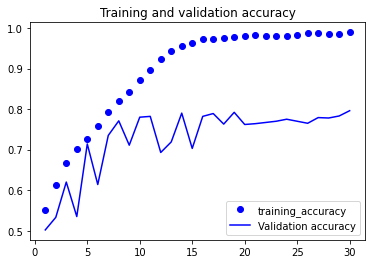

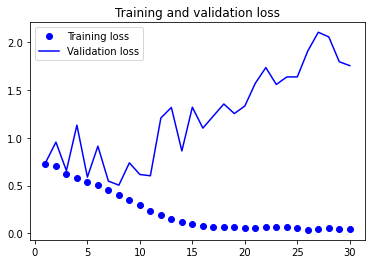

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss  =history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label = 'training_accuracy')
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# **looks like we have an overfitting**
**lets try some data augumentation**

In [ ]:
#data augumentaion
data_augmentation = keras.Sequential(
[
layers.RandomFlip("horizontal"), #Applies horizontal flipping to a random 50% of the images that go through it
layers.RandomRotation(0.1), #Rotates the input images by a random value in the range [–10%, +10%] (these are fractions of a full circle—in degrees, the range would be [–36 degrees, +36 degrees])
layers.RandomZoom(0.2), #Zooms in or out of the image by a random factor in the range [-20%, +20%]
]
)

**Display some data to show the output of our data augumentation**

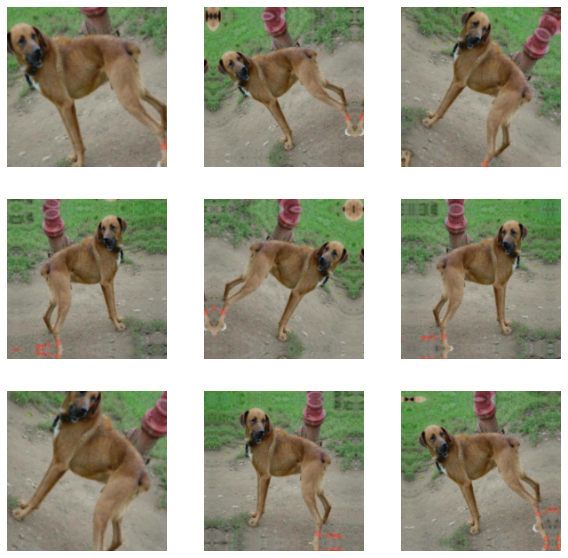

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in training_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# **Now lets define our model agian with data augumentation included**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)  #that's it
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

**training the modified model**

In [ ]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="convnet_from_scratch_with_augmentation.keras",
save_best_only=True,
monitor="val_loss")
]
history = model.fit(
training_dataset,
epochs=70,
validation_data=validation_dataset,
callbacks=callbacks)

Epoch 1/70
126/126 [==============================] - 18s 123ms/step - loss: 0.7069 - accuracy: 0.5075 - val_loss: 0.8280 - val_accuracy: 0.5000
Epoch 2/70
126/126 [==============================] - 14s 108ms/step - loss: 0.6939 - accuracy: 0.5422 - val_loss: 0.7620 - val_accuracy: 0.5100
Epoch 3/70
126/126 [==============================] - 14s 109ms/step - loss: 0.6540 - accuracy: 0.6154 - val_loss: 0.7777 - val_accuracy: 0.5960
Epoch 4/70
126/126 [==============================] - 14s 110ms/step - loss: 0.6853 - accuracy: 0.6549 - val_loss: 0.5864 - val_accuracy: 0.7020
Epoch 5/70
126/126 [==============================] - 14s 108ms/step - loss: 0.6064 - accuracy: 0.6699 - val_loss: 1.6180 - val_accuracy: 0.5010
Epoch 6/70
126/126 [==============================] - 14s 108ms/step - loss: 0.6000 - accuracy: 0.6922 - val_loss: 0.5859 - val_accuracy: 0.6970
Epoch 7/70
126/126 [==============================] - 14s 108ms/step - loss: 0.5808 - accuracy: 0.7021 - val_loss: 0.7514 - val_ac

Evaluate the model on test set

In [ ]:
test_model = keras.models.load_model(
"convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(testing_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 214s 5s/step - loss: 0.3764 - accuracy: 0.8440
Test accuracy: 0.844


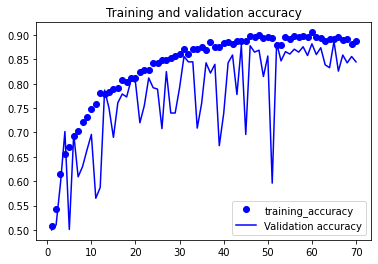

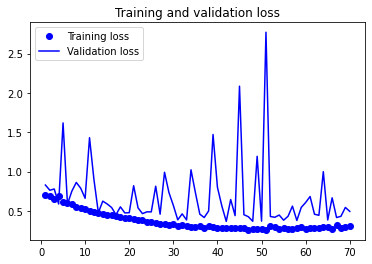

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss  =history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label = 'training_accuracy')
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Thats a good news, its more better now but stil having a low accuracy**

In [ ]:
test_model = keras.models.load_model(
"convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(testing_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 57ms/step - loss: 0.3764 - accuracy: 0.8440
Test accuracy: 0.844


# Now lets solve the problem using a much better way.  The pretrained model

In [ ]:
#first we need to instanting the VGG16 conv_base without including the the dense classifier because we need to do our own classifier
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False,
input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

**Extracting features and labels of VGG16**

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
  all_features = []
  all_labels = []
  for images, labels in dataset:
    preprocessed_images = keras.applications.vgg16.preprocess_input(images)
    features = conv_base.predict(preprocessed_images)
    all_features.append(features)
    all_labels.append(labels)
  return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(training_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(testing_data)

1/1 [==============================] - 0s 17ms/step


In [ ]:
train_features.shape
#look at our base summary to see the last maxpooling shape

(4002, 5, 5, 512)

# **Now it's time for our own classifier**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [keras.callbacks.ModelCheckpoint(
            filepath='/content/drive/My Drive/CatandDogs/save_after_each_epoch/save_after_VGG',
            save_best_only=True,
            monitor="val_loss")
            ]
history = model.fit(train_features, train_labels,
                    epochs=20,
                    validation_data=(val_features, val_labels),
                    callbacks=callbacks)

Epoch 1/20
126/126 [==============================] - 2s 16ms/step - loss: 11.6032 - accuracy: 0.9418 - val_loss: 5.7474 - val_accuracy: 0.9630
Epoch 2/20
126/126 [==============================] - 1s 10ms/step - loss: 2.6844 - accuracy: 0.9818 - val_loss: 5.1659 - val_accuracy: 0.9740
Epoch 3/20
126/126 [==============================] - 1s 10ms/step - loss: 1.8706 - accuracy: 0.9870 - val_loss: 5.1199 - val_accuracy: 0.9730
Epoch 4/20
126/126 [==============================] - 1s 11ms/step - loss: 1.5450 - accuracy: 0.9895 - val_loss: 4.9870 - val_accuracy: 0.9740
Epoch 5/20
126/126 [==============================] - 1s 5ms/step - loss: 0.9221 - accuracy: 0.9920 - val_loss: 10.9919 - val_accuracy: 0.9550
Epoch 6/20
126/126 [==============================] - 1s 6ms/step - loss: 0.7974 - accuracy: 0.9933 - val_loss: 5.8395 - val_accuracy: 0.9770
Epoch 7/20
126/126 [==============================] - 1s 5ms/step - loss: 0.8650 - accuracy: 0.9953 - val_loss: 9.3102 - val_accuracy: 0.9670


# plot the result to see how far better we go

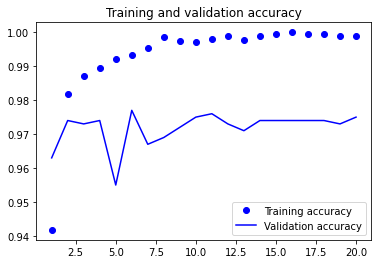

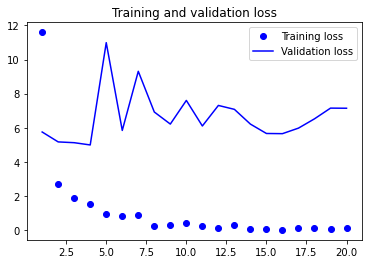

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# **the last result was much good. but how about including some data augumentation :)**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False)
conv_base.trainable = False

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
"before freezing the conv base:", len(conv_base.trainable_weights))

conv_base.trainable = False
print("This is the number of trainable weights ","after freezing the conv base:", len(conv_base.trainable_weights))


This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights  after freezing the conv base: 0


# **Now lets add data augumentation and our classifier**

In [ ]:
data_augmentation = keras.Sequential(
[
layers.RandomFlip("horizontal"),
layers.RandomRotation(0.1),
layers.RandomZoom(0.2),
]
)
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
optimizer="rmsprop",
metrics=["accuracy"])

In [ ]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="feature_extraction_with_data_augmentation.keras",
save_best_only=True,
monitor="val_loss")
]

history = model.fit(
training_dataset,
epochs=50,
validation_data=validation_dataset,
callbacks=callbacks)

Epoch 1/50
126/126 [==============================] - 25s 182ms/step - loss: 11.3647 - accuracy: 0.9220 - val_loss: 3.4616 - val_accuracy: 0.9740
Epoch 2/50
126/126 [==============================] - 24s 186ms/step - loss: 6.4198 - accuracy: 0.9495 - val_loss: 3.3513 - val_accuracy: 0.9820
Epoch 3/50
126/126 [==============================] - 24s 185ms/step - loss: 4.6220 - accuracy: 0.9553 - val_loss: 3.1945 - val_accuracy: 0.9760
Epoch 4/50
126/126 [==============================] - 24s 185ms/step - loss: 3.1038 - accuracy: 0.9663 - val_loss: 3.2318 - val_accuracy: 0.9760
Epoch 5/50
126/126 [==============================] - 24s 183ms/step - loss: 2.9059 - accuracy: 0.9613 - val_loss: 3.3958 - val_accuracy: 0.9740
Epoch 6/50
126/126 [==============================] - 24s 183ms/step - loss: 2.1109 - accuracy: 0.9675 - val_loss: 1.8951 - val_accuracy: 0.9780
Epoch 7/50
126/126 [==============================] - 24s 186ms/step - loss: 2.2485 - accuracy: 0.9663 - val_loss: 1.7108 - val_a

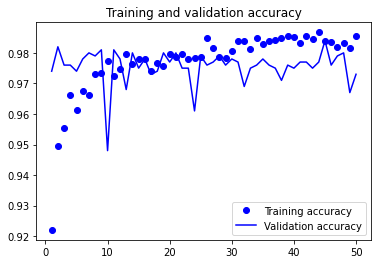

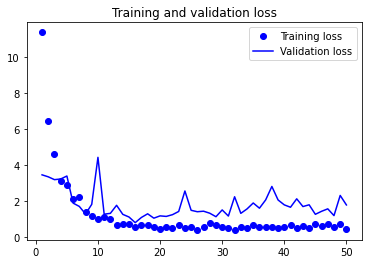

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# **Looks like we are in the right way** **;)**

In [ ]:
test_model = keras.models.load_model(
"feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(testing_data)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 113ms/step - loss: 1.4911 - accuracy: 0.9740
Test accuracy: 0.974
